In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/emails.csv')

In [4]:
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [7]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download ('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    text = text.lower()

    tokens = word_tokenize(text)

    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned)

df['clean_text'] = df ['body'].apply(clean_text)

In [11]:
df[['body', 'clean_text']].head()

,body,clean_text
0,"Buck up, your troubles caused by small dimensi...",buck trouble caused small dimension soon becom...
1,\nUpgrade your sex and pleasures with these te...,upgrade sex pleasure technique http www bright...
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,daily top cnn com top video story aug pm edt t...
3,Would anyone object to removing .so from this ...,would anyone object removing list tld basicall...
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,welcomefastshippingcustomersupport http iwfna ...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(max_features=3000)

In [23]:
X = vectorizer.fit_transform(df['clean_text'])

In [25]:
y = df['label']

In [31]:
non_zero_counts = (X != 0).sum(axis=1)
non_zero_counts[:5]


matrix([[ 15],
        [  7],
        [188],
        [227],
        [  6]])

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [41]:
y_pred = model.predict(X_test)


In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97228961818414

Confusion Matrix:
 [[3466   24]
 [ 193 4148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3490
           1       0.99      0.96      0.97      4341

    accuracy                           0.97      7831
   macro avg       0.97      0.97      0.97      7831
weighted avg       0.97      0.97      0.97      7831



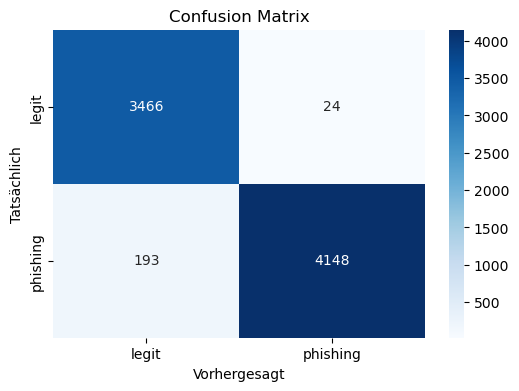

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['legit', 'phishing'], 
            yticklabels=['legit', 'phishing'])
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Confusion Matrix')
plt.show()

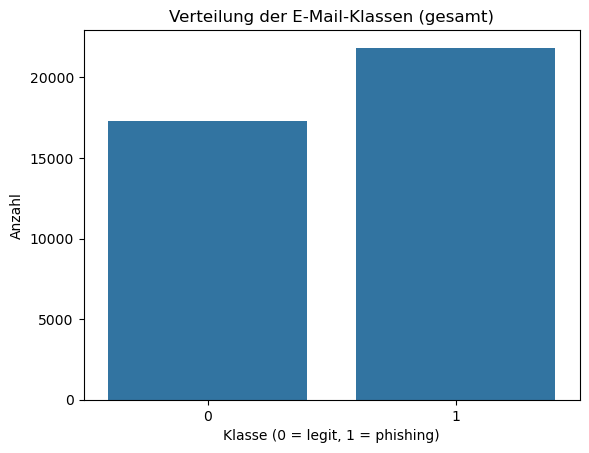

In [48]:
sns.countplot(x=y)
plt.title('Verteilung der E-Mail-Klassen (gesamt)')
plt.xlabel('Klasse (0 = legit, 1 = phishing)')
plt.ylabel('Anzahl')
plt.show()


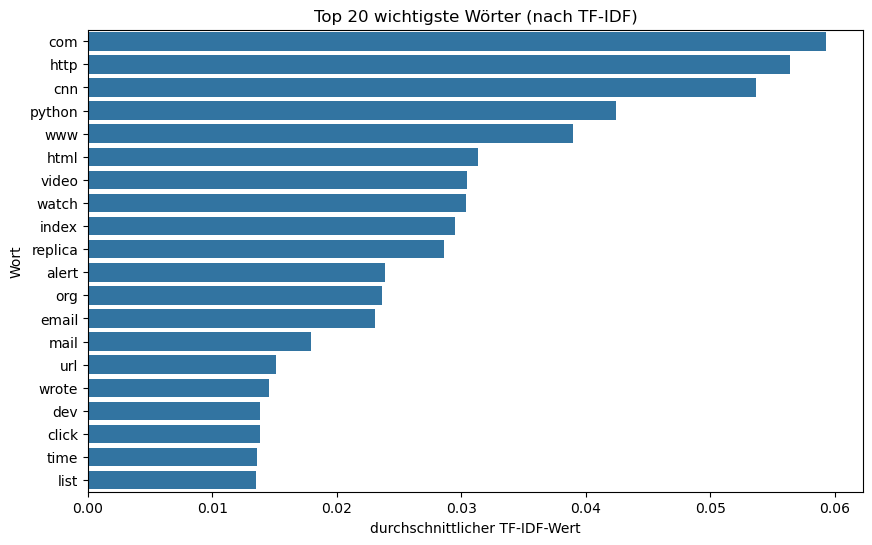

In [50]:
import pandas as pd

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_means = X_df.mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(10,6))
sns.barplot(x=tfidf_means.values, y=tfidf_means.index)
plt.title('Top 20 wichtigste Wörter (nach TF-IDF)')
plt.xlabel('durchschnittlicher TF-IDF-Wert')
plt.ylabel('Wort')
plt.show()


In [54]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


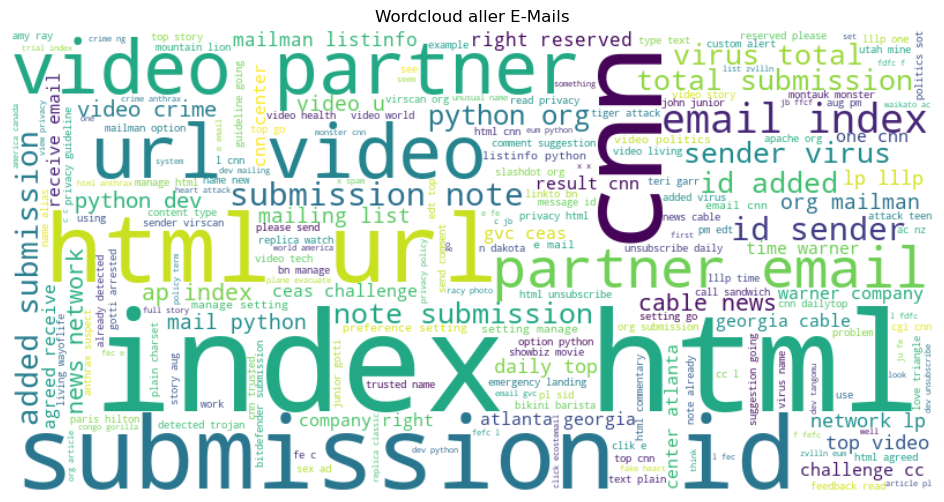

In [56]:
from wordcloud import WordCloud

text = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud aller E-Mails")
plt.show()


In [13]:
import pandas as pd

chunks = pd.read_csv("../data/dataset1.csv", chunksize=100_000)

for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}")
    display(chunk.head())
    break

Chunk 1


/var/folders/54/8g2y40vj56g09lzbhhrwhd0m0000gn/T/ipykernel_94277/3071571776.py:5: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunks):


,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
0,maildir,arnold-j,<17334447.1075857585446.JavaMail.evans@thyme>,"Thu, 16 Nov 2000 09:30:00 -0800 (PST)",msagel@home.com,jarnold@enron.com,Status,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,...,,Enron Data,b399fa1ba5ec06ccf8ead1049a53be981d0ebb39ee2c94...,False,False,External,18.0,False,False,0
1,maildir,arnold-j,<19171686.1075857585034.JavaMail.evans@thyme>,"Fri, 8 Dec 2000 05:05:00 -0800 (PST)",slafontaine@globalp.com,john.arnold@enron.com,re:summer inverses,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,84b07d7a0a17b545896f670f92d200e86843c2796147d9...,False,False,External,4.0,True,False,0
2,maildir,arnold-j,<29887033.1075857630725.JavaMail.evans@thyme>,"Tue, 15 May 2001 09:43:00 -0700 (PDT)",iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...",The WTI Bullet swap contracts,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,f7482dd06262f46d341e733aa0c2fb55cb1e257ea153d0...,False,False,External,3.0,True,False,0
3,maildir,arnold-j,<2526360.1075857584903.JavaMail.evans@thyme>,"Mon, 11 Dec 2000 23:52:00 -0800 (PST)",klarnold@flash.net,john.arnold@enron.com,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,25441e5a837fefda50527731fdbcdf0848663be82cd1ce...,False,False,External,9.0,False,True,0
4,maildir,arnold-j,<30102065.1075857630952.JavaMail.evans@thyme>,"Mon, 14 May 2001 23:59:00 -0700 (PDT)",soblander@carrfut.com,soblander@carrfut.com,daily charts and matrices as hot links 5/15,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,c2995c6a70b953ee66c21d8a509ebfbfaca28277917beb...,False,False,External,352.0,False,False,0


In [17]:
import pandas as pd

df_check = pd.read_csv('../data/dataset1.csv', nrows=5, low_memory=False)

print(df_check.columns.tolist())


['Folder-User', 'Folder-Name', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName', 'Body', 'Cc', 'Bcc', 'Time', 'Attendees', 'Re', 'Source', 'Mail-ID', 'POI-Present', 'Suspicious-Folders', 'Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm', 'Contains-Reply-Forwards', 'Label']


In [19]:
df_new = pd.read_csv('../data/dataset1.csv', low_memory=False)

df_new = df_new[['Body', 'Label']]

df_new = df_new.rename(columns={"Body": "body", "Label": "label"})

df_new.head()


,body,label
0,Status John: I'm not really sure what happened...,0
1,re:summer inverses i suck-hope youve made more...,0
2,"The WTI Bullet swap contracts Hi, Following th...",0
3,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,0
4,daily charts and matrices as hot links 5/15 Th...,0


In [30]:
# Zugriff auf andere Ordner ermöglichen
import sys
import os
sys.path.append(os.path.abspath('../src'))  # <-- damit Python in src/ nachschaut

# pandas & andere Imports
import pandas as pd

# Jetzt Funktion aus preprocessing.py importieren
from preprocessing import clean_text

# 📥 CSV-Datei laden (groß, daher mit low_memory=False)
df_new = pd.read_csv('../data/dataset1.csv', low_memory=False)

# 🔧 Nur die benötigten Spalten extrahieren & umbenennen
df_new = df_new[['Body', 'Label']]
df_new = df_new.rename(columns={"Body": "body", "Label": "label"})

# 🧼 Text bereinigen
df_new['clean_text'] = df_new['body'].apply(clean_text)

# ✅ Ersten paar Zeilen anschauen
df_new.head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mirangokpinar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,body,label,clean_text
0,Status John: I'm not really sure what happened...,0,status john really sure happened u impression ...
1,re:summer inverses i suck-hope youve made more...,0,summer inverse suck hope youve made money natg...
2,"The WTI Bullet swap contracts Hi, Following th...",0,wti bullet swap contract hi following e mail r...
3,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,0,fwd nytimes com article suspended rabbi quits ...
4,daily charts and matrices as hot links 5/15 Th...,0,daily chart matrix hot link information contai...


In [35]:
# Originaldaten laden
df_orig = pd.read_csv('../data/emails.csv')

# Bereinigen wie beim neuen Datensatz
df_orig['clean_text'] = df_orig['body'].apply(clean_text)


In [37]:
# Nur die benötigten Spalten auswählen und zusammenführen
df_combined = pd.concat([
    df_orig[['clean_text', 'label']],
    df_new[['clean_text', 'label']]
], ignore_index=True)


In [39]:
# Speichern für das Training
df_combined.to_csv('../data/combined_emails.csv', index=False)
